In [1]:
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
import importlib
from skimage import morphology
from skimage.segmentation import find_boundaries
import porespy as ps

In [2]:
mask_nu = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/results/20190401_E2_DAPI_CardiacRegion_0.5_EQ_MASK_ZXY.nii.gz"
mask_mem = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/20190401_E2_mGFP_CardiacRegion_0.5_XYZ_predictions_GASP.nii.gz"
nuclei = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2/20190401_E2_DAPI_CardiacRegion_0.5.nii.gz"
mem = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2/20190401_E2_mGFP_CardiacRegion_0.5.nii.gz"


In [5]:
pred_nu = nib.load(mask_nu).get_fdata()
pred_nu.shape

(480, 881, 900)

In [6]:
pred_nu = np.swapaxes(np.swapaxes(pred_nu, 0, 2), 1, 0)
pred_nu.shape

(881, 900, 480)

In [7]:
pred_mem = nib.load(mask_mem).get_fdata()
pred_mem.shape

(881, 900, 480)

In [8]:
DAPI = nib.load(nuclei).get_fdata()
DAPI = DAPI[:,:,:,0]
DAPI.shape

(881, 900, 480)

In [9]:
MEM = nib.load(mem).get_fdata()
MEM = MEM[:,:,:,0]
MEM.shape

(881, 900, 480)

In [10]:
bound_mem = find_boundaries(pred_mem)

In [ ]:
print(len(np.unique(pred_mem)))
print(len(np.unique(pred_nu)))

[0.000e+00 2.000e+00 3.000e+00 ... 8.821e+03 8.822e+03 8.823e+03]


In [ ]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [pred_mem[:, :, n],MEM[:,:,n],pred_nu[:, :, n],DAPI[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

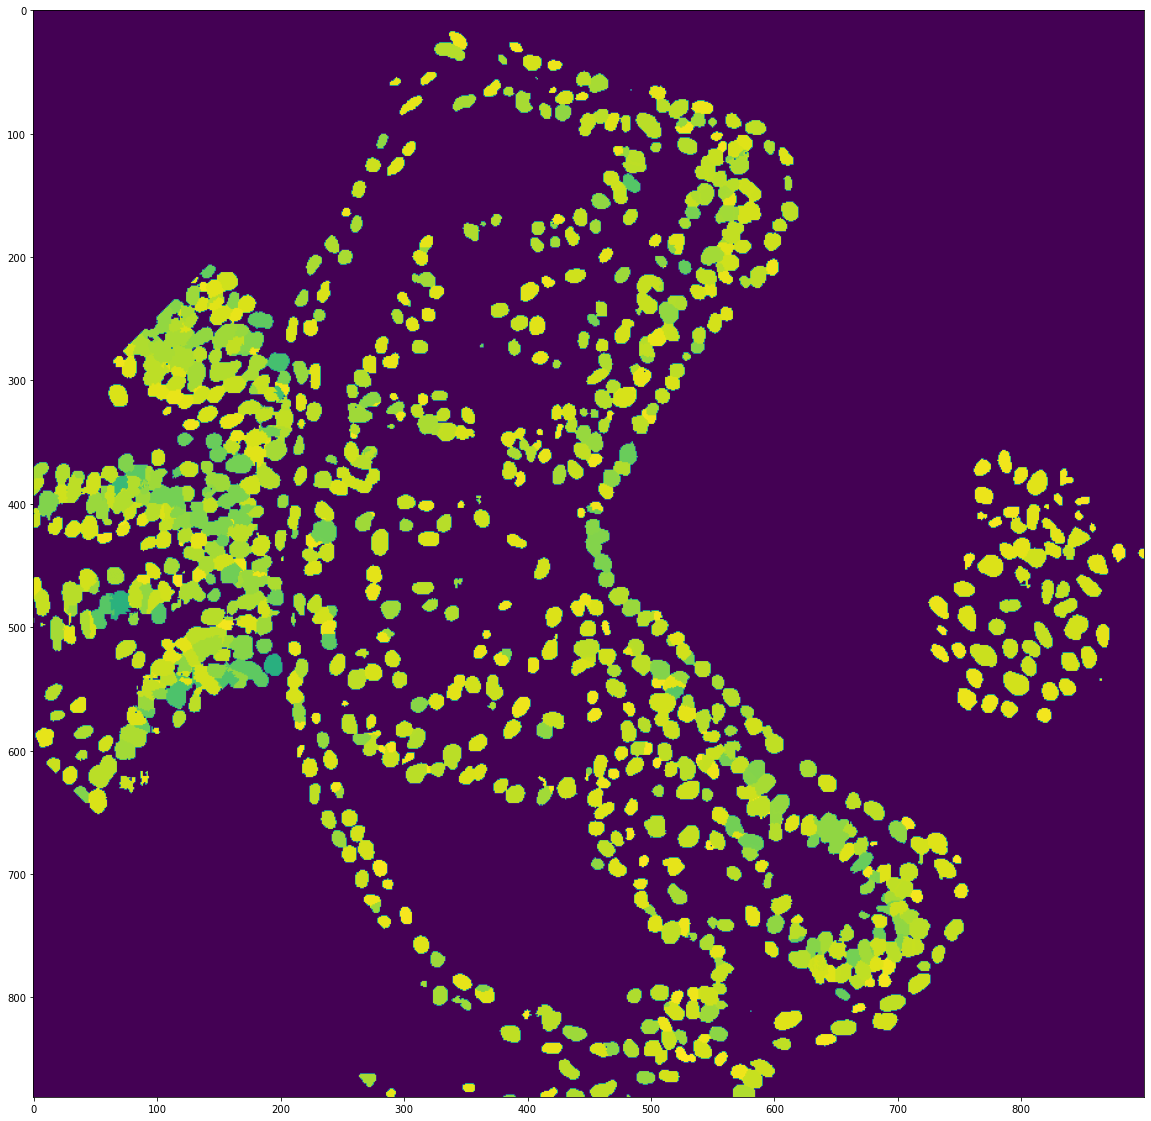

In [11]:
n = 150
plt.figure(figsize=(20,20))
plt.imshow(15*bound_mem[:, :, n] + pred_nu[:, :, n])

In [12]:
img_mem = morphology.label(pred_mem)
props_mem = ps.metrics.regionprops_3D(img_mem)

In [15]:
img_nu = morphology.label(pred_nu)
props_nu = ps.metrics.regionprops_3D(img_nu)

In [15]:
print(len(props_mem))
print(len(props_nu))

8804
35934


### BORRAR NUCLEOS FUERA DEL AREA MESODERMO

In [13]:
mask_mem = np.where(pred_mem != 0, True, False)

In [16]:
mask_mem.shape

(881, 900, 480)

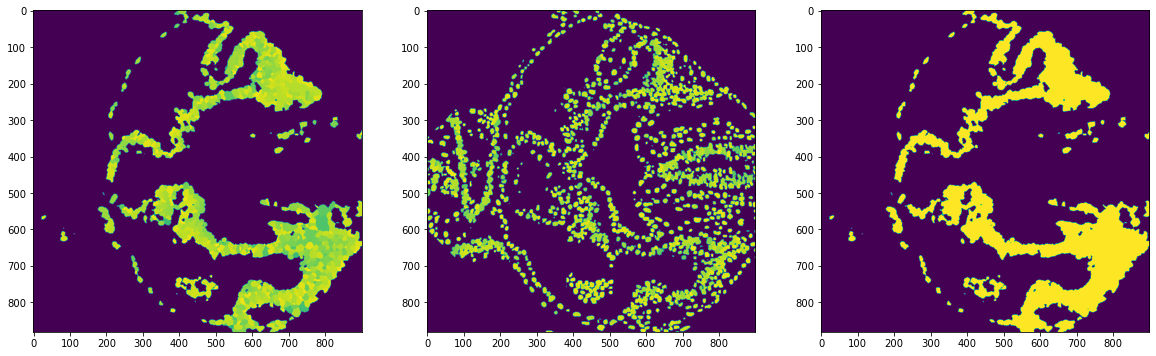

In [17]:
n = 200
plt.figure(figsize=(20,20))
plots = [pred_mem[:, :, n], pred_nu[:, :, n],mask_mem[:,:,n]]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

In [18]:
mask_on_nuclei = mask_mem * pred_nu
mask_on_nuclei.shape

(881, 900, 480)

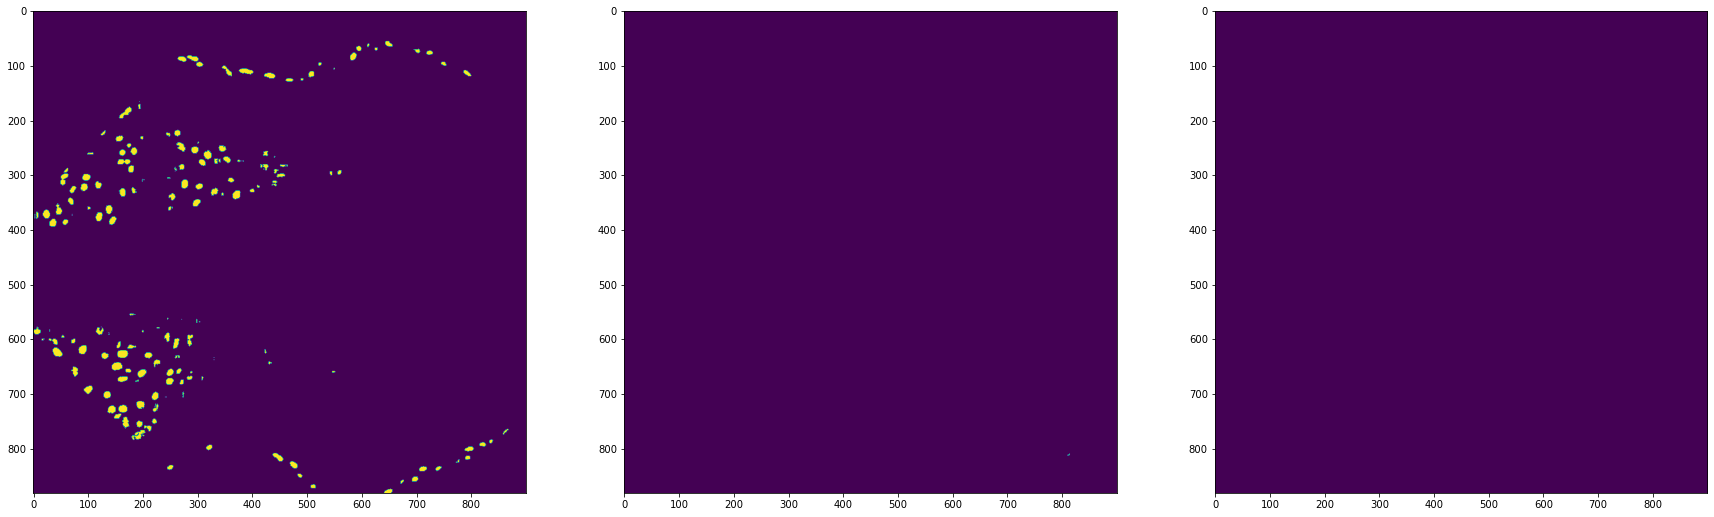

In [19]:
for t in range(24):
    plt.figure(figsize=(30,30)) 
    n = 20*t
    plots = [pred_nu[:, :, n], mask_mem[:, :, n], mask_on_nuclei[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

### Sacar labels de los centtroides membrana

In [23]:
centroids_mem = [[round(i) for i in p["centroid"]] for p in props_mem]
original_labels_centroids = [img_mem[c[0],c[1],c[2]] for c in centroids_mem]

In [24]:
df = pd.DataFrame({"cell":range(len(props_mem)),
                  "volumes": [p.volume for p in props_mem], 
                  "original_labels":original_labels_centroids})

In [25]:
df.describe()

,cell,volumes,original_labels
count,8804.000000,8804.000000,8804.000000
mean,4401.500000,3807.582803,4399.485120
std,2541.640218,4600.861363,2544.669938
min,0.000000,41.000000,0.000000
25%,2200.750000,2095.750000,2194.750000
50%,4401.500000,2858.000000,4400.500000
75%,6602.250000,4104.500000,6604.250000
max,8803.000000,138563.000000,8804.000000


## fiLTRAR POR TAMAÑO

In [30]:
df_clean = df[df.original_labels != 0]
df_clean = df_clean[df_clean.volumes < 1.5*np.median(df_clean.volumes)]
df_clean = df_clean[df_clean.volumes > 0.2*np.median(df_clean.volumes)]
df_clean.describe()

,cell,volumes,original_labels
count,6437.000000,6437.000000,6437.000000
mean,4322.534566,2593.377971,4323.534566
std,2552.516416,817.839767,2552.516416
min,0.000000,499.000000,1.000000
25%,2061.000000,2007.000000,2062.000000
50%,4276.000000,2555.000000,4277.000000
75%,6552.000000,3184.000000,6553.000000
max,8796.000000,4283.000000,8797.000000


### Centroides de nucleos

In [7]:
img_nu2 = morphology.label(mask_on_nuclei)
props_nu2 = ps.metrics.regionprops_3D(img_nu2)
centroids_nu = [[round(i) for i in p["centroid"]] for p in props_nu2]

NameError: name 'mask_on_nuclei' is not defined

#### labels del centroide - nu 

In [32]:
NU_original_labels_centroids = [img_nu2[c[0],c[1],c[2]] for c in centroids_nu]

In [6]:
props_nu2

NameError: name 'props_nu2' is not defined

In [ ]:
### MARCAR CADA CENTROIDE CON SU LABEL 

In [ ]:
centros = np.zeros(img_nu2.shape)
for i,c in enumerate(centroids_nu):
    centros[c[0],c[1], c[2]] = props_nu2[i].label

In [ ]:
### DICTIONARY {LABEL PROP : LABEL CENTROIDE}

In [34]:
dict_labels_nu = {}
dict_labels_cent = {}
for p in props_mem:
    x = list(np.unique(centros[p.slices]))
    x.remove(0)
    if x:
        dict_labels_cent[p.label] = x[0]
    else:
        dict_labels_cent[p.label] = 0

In [35]:
dict_labels_cent

{1: 1.0,
 2: 2.0,
 3: 3.0,
 4: 5.0,
 5: 4.0,
 6: 6.0,
 7: 0,
 8: 7.0,
 9: 0,
 10: 0,
 11: 52.0,
 12: 9.0,
 13: 9.0,
 14: 0,
 15: 10.0,
 16: 25.0,
 17: 0,
 18: 11.0,
 19: 28.0,
 20: 12.0,
 21: 0,
 22: 13.0,
 23: 0,
 24: 0,
 25: 0,
 26: 13.0,
 27: 15.0,
 28: 0,
 29: 14.0,
 30: 16.0,
 31: 26.0,
 32: 17.0,
 33: 18.0,
 34: 17.0,
 35: 0,
 36: 0,
 37: 20.0,
 38: 19.0,
 39: 21.0,
 40: 22.0,
 41: 0,
 42: 23.0,
 43: 24.0,
 44: 0,
 45: 2.0,
 46: 28.0,
 47: 30.0,
 48: 13.0,
 49: 13.0,
 50: 34.0,
 51: 28.0,
 52: 32.0,
 53: 35.0,
 54: 42.0,
 55: 36.0,
 56: 37.0,
 57: 38.0,
 58: 39.0,
 59: 53.0,
 60: 30.0,
 61: 0,
 62: 52.0,
 63: 46.0,
 64: 56.0,
 65: 40.0,
 66: 43.0,
 67: 117.0,
 68: 55.0,
 69: 48.0,
 70: 32.0,
 71: 51.0,
 72: 62.0,
 73: 25.0,
 74: 66.0,
 75: 64.0,
 76: 48.0,
 77: 69.0,
 78: 65.0,
 79: 48.0,
 80: 42.0,
 81: 61.0,
 82: 54.0,
 83: 68.0,
 84: 77.0,
 85: 73.0,
 86: 74.0,
 87: 0,
 88: 79.0,
 89: 83.0,
 90: 85.0,
 91: 64.0,
 92: 56.0,
 93: 87.0,
 94: 72.0,
 95: 64.0,
 96: 103.0,
 97: 53.0

### ARRAY CON CENTROIDES MARCADOS - NU 

In [121]:
for i in list(df_clean.cell):
    prop = props_mem[i]
    s = ps.tools.bbox_to_slices(prop.bbox)
    break

In [102]:
s

(slice(0, 13, None), slice(346, 362, None), slice(162, 177, None))

In [103]:
prop.slices

(slice(0, 13, None), slice(346, 362, None), slice(162, 177, None))

In [123]:
prop.mask.shape

(6, 21, 14)

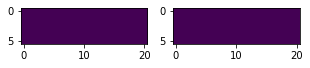

In [152]:
for t in range(14):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [img_nu2[prop.slices][:,:, n], centros[p.slices][:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [150]:
centros[p.slices].shape

(6, 21, 14)

In [158]:
list(np.unique(centros[p.slices]))

[0.0, 1.0]

In [160]:
x = list(np.unique(centros[p.slices]))

In [ ]:
#from skimage.morphology import disk, binary_dilation
#centros = binary_dilation(centros, morphology.ball(radius=4)) 

In [167]:
dict_labels_cent

{1: 1.0,
 2: 2.0,
 3: 3.0,
 4: 5.0,
 5: 4.0,
 6: 6.0,
 7: 0,
 8: 7.0,
 9: 0,
 10: 0,
 11: 52.0,
 12: 9.0,
 13: 9.0,
 14: 0,
 15: 10.0,
 16: 25.0,
 17: 0,
 18: 11.0,
 19: 28.0,
 20: 12.0,
 21: 0,
 22: 13.0,
 23: 0,
 24: 0,
 25: 0,
 26: 13.0,
 27: 15.0,
 28: 0,
 29: 14.0,
 30: 16.0,
 31: 26.0,
 32: 17.0,
 33: 18.0,
 34: 17.0,
 35: 0,
 36: 0,
 37: 20.0,
 38: 19.0,
 39: 21.0,
 40: 22.0,
 41: 0,
 42: 23.0,
 43: 24.0,
 44: 0,
 45: 2.0,
 46: 28.0,
 47: 30.0,
 48: 13.0,
 49: 13.0,
 50: 34.0,
 51: 28.0,
 52: 32.0,
 53: 35.0,
 54: 42.0,
 55: 36.0,
 56: 37.0,
 57: 38.0,
 58: 39.0,
 59: 53.0,
 60: 30.0,
 61: 0,
 62: 52.0,
 63: 46.0,
 64: 56.0,
 65: 40.0,
 66: 43.0,
 67: 117.0,
 68: 55.0,
 69: 48.0,
 70: 32.0,
 71: 51.0,
 72: 62.0,
 73: 25.0,
 74: 66.0,
 75: 64.0,
 76: 48.0,
 77: 69.0,
 78: 65.0,
 79: 48.0,
 80: 42.0,
 81: 61.0,
 82: 54.0,
 83: 68.0,
 84: 77.0,
 85: 73.0,
 86: 74.0,
 87: 0,
 88: 79.0,
 89: 83.0,
 90: 85.0,
 91: 64.0,
 92: 56.0,
 93: 87.0,
 94: 72.0,
 95: 64.0,
 96: 103.0,
 97: 53.0

In [176]:
cells_with_nuclei = [k for k,v in dict_labels_cent.items() if v != 0]

In [177]:
pred_mem_with_nuclei = np.where(pred_mem in cells_with_nuclei, pred_mem, 0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [178]:
t = np.zeros([2,2,2])
t

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [180]:
pred_mem in cells_with_nuclei

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

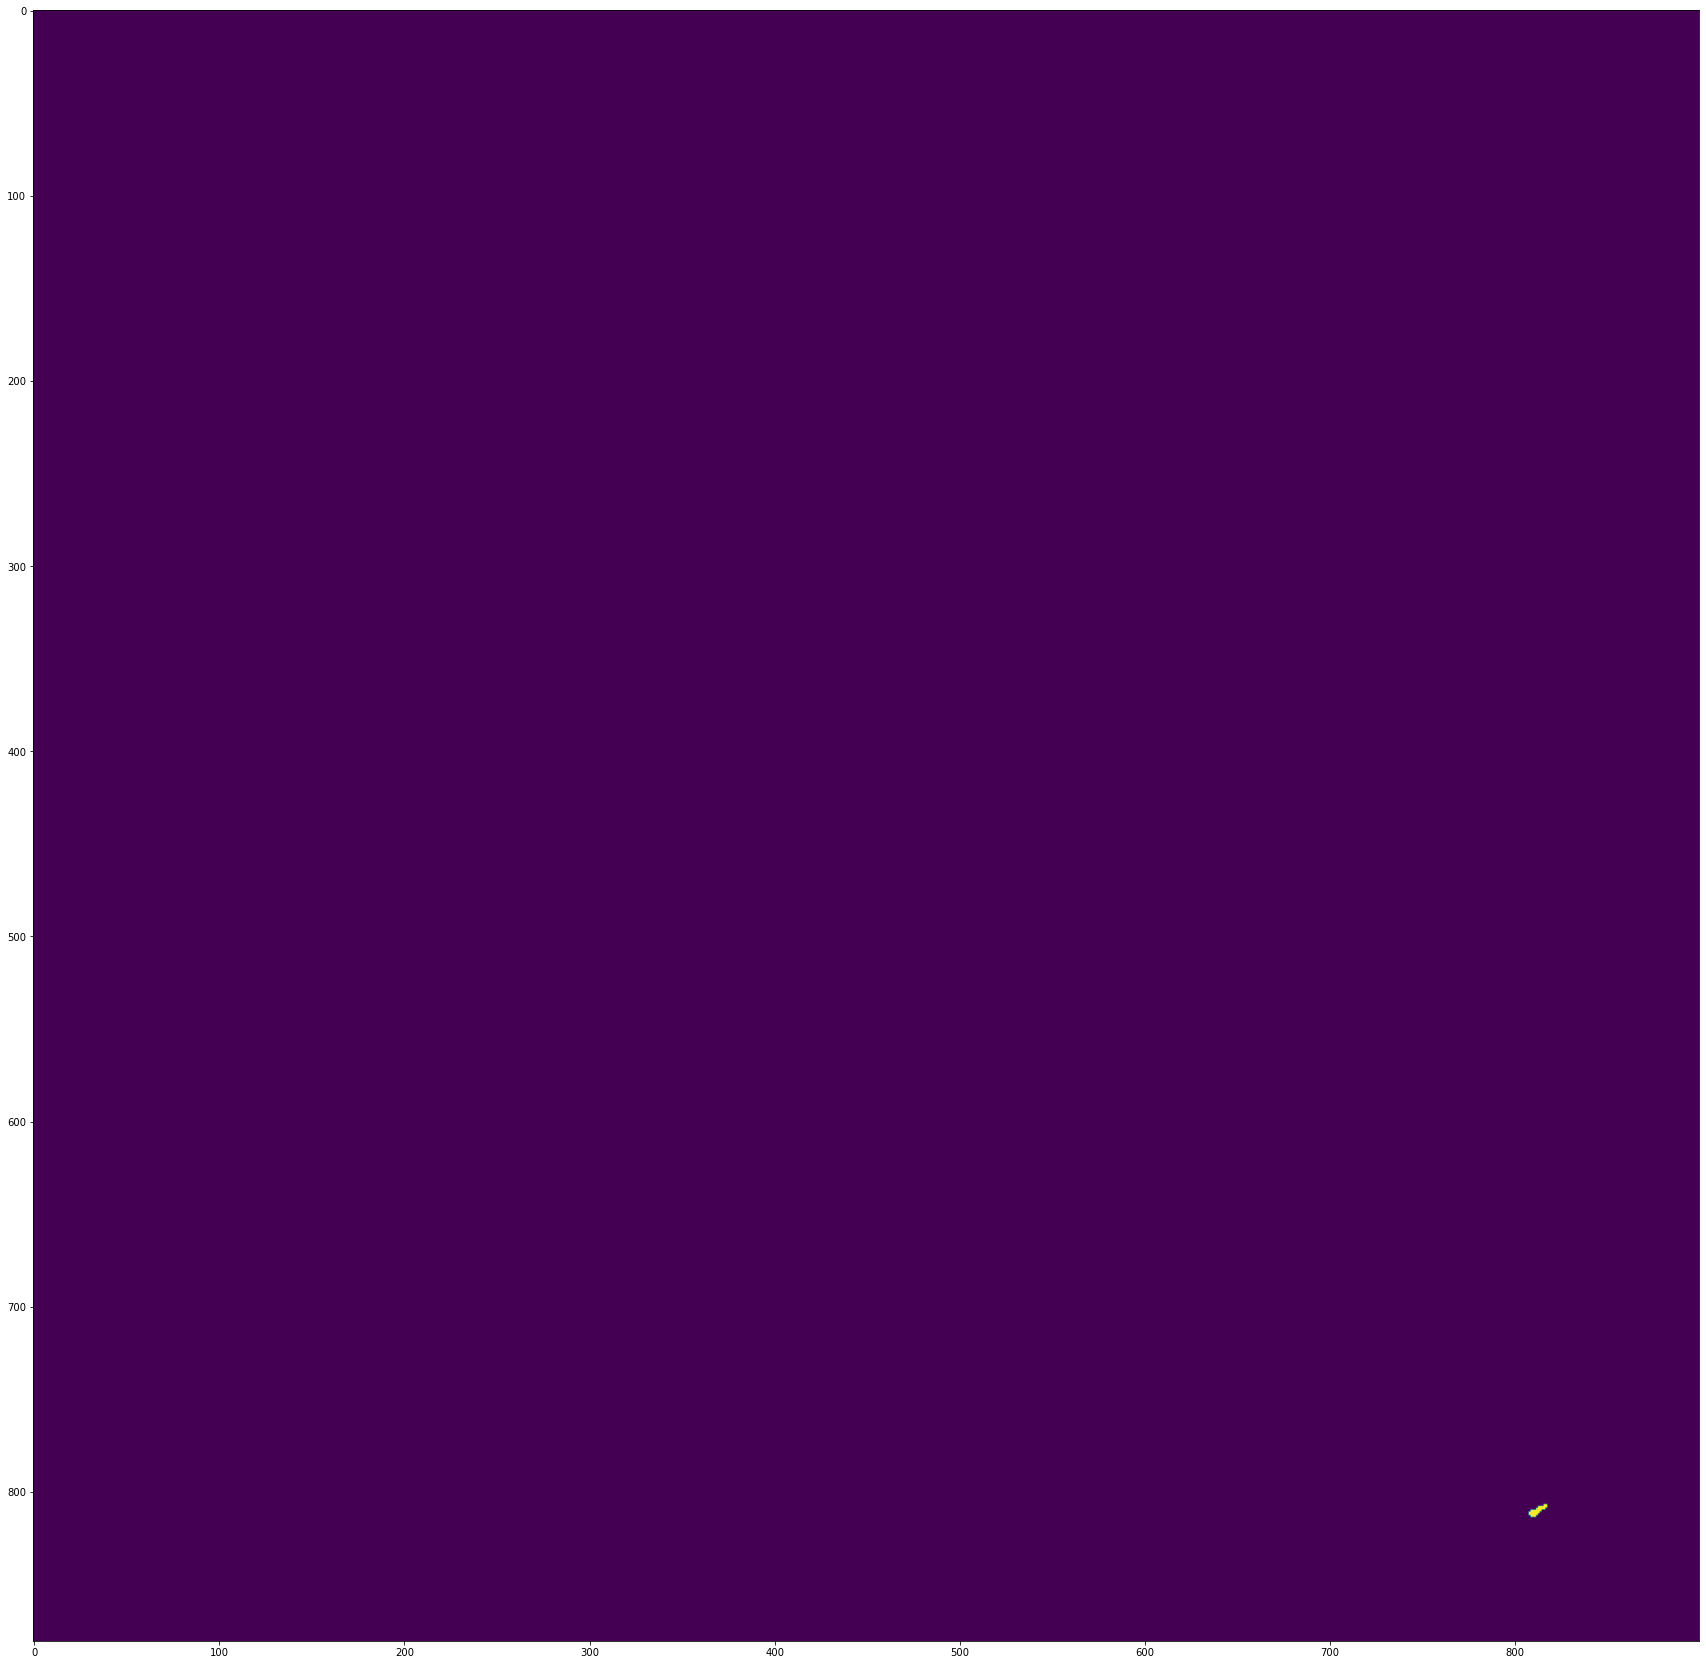

In [181]:
for t in range(24):
    plt.figure(figsize=(30,30)) 
    n = 20*t
    plots = [centros[:, :, n] + bound[:, :, n] ]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

(slice(0, 6, None), slice(367, 388, None), slice(255, 269, None))

In [17]:
props_mem[0].mask.shape

(6, 21, 14)

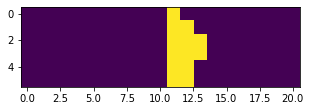

In [19]:
for t in range(14):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [props_mem[0].border[:,:, n] + ]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [ ]:
props_mem[0].border[:,:, n]